In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import Callback
import time
import matplotlib.image as pimg

Using TensorFlow backend.


In [2]:
#-------------------------------------------------------------
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.savefig('acc-loss of nn.png', dpi=400)
        plt.show()

In [3]:
#-------------------------------------------------------------
#下载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#--------------------------------------------------------------
# 数据预处理
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)
#-------------------------------------------------------------

In [4]:
#-------------------------------------------------------------------------
# 建立神经网络
model = Sequential([
    Dense(30, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
#--------------------------------------------------------------------------
# 优化函数
Adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#--------------------------------------------------------------------------
# 编译
model.compile(optimizer=Adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#--------------------------------------------------------------------------
#创建一个实例history
history = LossHistory()

#--------------------------------------------------------------------------
# 训练
print('Training ------------')
model.fit(X_train, y_train,
          validation_split=0.3,epochs=50,verbose=2,
          batch_size=512,
          callbacks=[history])
#,keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=2, mode='auto')

Training ------------
Train on 42000 samples, validate on 18000 samples
Epoch 1/50
 - 2s - loss: 1.1184 - acc: 0.6903 - val_loss: 0.5126 - val_acc: 0.8697
Epoch 2/50
 - 1s - loss: 0.4356 - acc: 0.8864 - val_loss: 0.3622 - val_acc: 0.9002
Epoch 3/50
 - 1s - loss: 0.3414 - acc: 0.9069 - val_loss: 0.3162 - val_acc: 0.9127
Epoch 4/50
 - 1s - loss: 0.3013 - acc: 0.9166 - val_loss: 0.2876 - val_acc: 0.9200
Epoch 5/50
 - 1s - loss: 0.2749 - acc: 0.9233 - val_loss: 0.2698 - val_acc: 0.9246
Epoch 6/50
 - 1s - loss: 0.2551 - acc: 0.9290 - val_loss: 0.2573 - val_acc: 0.9267
Epoch 7/50
 - 1s - loss: 0.2400 - acc: 0.9326 - val_loss: 0.2454 - val_acc: 0.9298
Epoch 8/50
 - 1s - loss: 0.2265 - acc: 0.9354 - val_loss: 0.2334 - val_acc: 0.9348
Epoch 9/50
 - 1s - loss: 0.2167 - acc: 0.9389 - val_loss: 0.2274 - val_acc: 0.9351
Epoch 10/50
 - 1s - loss: 0.2034 - acc: 0.9431 - val_loss: 0.2181 - val_acc: 0.9384
Epoch 11/50
 - 1s - loss: 0.1966 - acc: 0.9445 - val_loss: 0.2126 - val_acc: 0.9399
Epoch 12/50
 


Testing ------------
10000/10000 [==============================] - 1s 56us/step
test loss:  0.129770015723
test accuracy:  0.9612


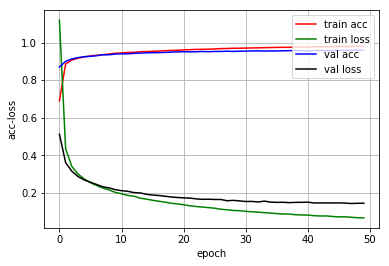

In [5]:
#--------------------------------------------------------------------------
#测试评价
print('\nTesting ------------')
loss, accuracy = model.evaluate(X_test, y_test)
#---------------------------------------------------------------------------
print('test loss: ', loss)
print('test accuracy: ', accuracy)
#---------------------------------------------------------------------------
#绘制acc-loss曲线
history.loss_plot('epoch')